In [522]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
from matplotlib.lines import Line2D

folder = '../../AfterFailure'

In [523]:
csvs = []

count_nan = 0
for i, file in enumerate(os.listdir(folder + '/csvs')):
    df = pd.read_csv(folder + '/csvs' + '/' + file)
    if (df.batch_size == 64).any():
        df.rename(columns={'Unnamed: 0' : 'epoch'}, inplace=True)
        count_nan += df.shape[0] * df.shape[1] - np.sum(df.count())
        df['list_index'] = len(csvs)
        filename = file.split("_")
        # print(filename[0][-2:].isdigit())
        if filename[0][-2:].isdigit(): df['exp'] = filename[0][-2:]
        else: df['exp'] = filename[0][-1]
        csvs.append(df)

print(f"Total number of Nans: {count_nan}")

Total number of Nans: 23


In [524]:
nan_index = []
for i, df in enumerate(csvs):
    nan_index.append(list(df[(df['val_acc'].isnull()) | (df['train_acc'].isnull()) |(df['train_updates'].isnull()) | (df['val_updates'].isnull())].index))

print(nan_index)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


In [525]:
# weird_acc = []
# for i, df in enumerate(csvs):
#     weird_acc.append(list(df[(df['val_acc']>1) | (df['val_acc']<0.1) | (df['train_acc']>1) | (df['train_acc']<0.1)].index))
# # for df in csvs:
# #     df.drop(df[(df['val_acc']>1) | (df['val_acc']<0)].index, inplace = True)
#
# see = [csvs[i].iloc[l[0]] for i, l in enumerate(weird_acc) if l]
#
# early_stopped_dfs = []
# for i in range(len(csvs)):
#     n = nan_index[i]
#     v = weird_acc[i]
#     if n and v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(min(v), min(n))]])
#     elif n:
#         early_stopped_dfs.append(csvs[i].iloc[[min(n)]])
#     elif v:
#         early_stopped_dfs.append(csvs[i].iloc[[min(v)]])
#

In [526]:
# early_stopped = pd.concat(early_stopped_dfs)
# early_stopped.drop(columns=['val_acc', 'train_acc', 'val_updates', 'train_updates', 'early_stopping'], inplace=True)
# print("Networks that stopped early")
# early_stopped
# csvs[0].columns
# csvs[2]
# for df in csvs:
#     print(len(df))

In [527]:
# manual_early_stopping = {4: 36,5: 28, 12: 12, 14:27, 32:18, 35:23, 41:35, 46: 12,53:12}
#
# for key, val in manual_early_stopping.items():
#     csvs[key].drop(labels = range(val, 40), inplace=True)

In [528]:
big_df = pd.concat(csvs)
big_df.describe()

,epoch,batch_size,cost_per_sample,hidden_units,learning_rate,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index
count,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.73E+03,4.70E+03,4.73E+03,4.73E+03,4.73E+03
mean,4.54E+01,6.40E+01,3.03E-04,3.20E+01,2.50E-04,1.62E-02,1.01E+00,7.20E-01,6.60E-01,7.31E-01,6.59E-01,5.06E-01,2.50E-02,4.55E-02,2.92E+01
std,3.13E+01,0.00E+00,4.32E-04,0.00E+00,0.00E+00,3.40E-02,7.96E-01,1.14E-01,3.07E-01,1.23E-01,3.04E-01,1.37E-01,3.87E-02,1.22E-01,1.77E+01
min,0.00E+00,6.40E+01,1.00E-06,3.20E+01,2.50E-04,0.00E+00,0.00E+00,4.93E-01,1.90E-02,4.88E-01,1.89E-02,2.60E-01,2.23E-05,0.00E+00,0.00E+00
25%,1.90E+01,6.40E+01,1.00E-05,3.20E+01,2.50E-04,1.00E-04,0.00E+00,6.57E-01,3.18E-01,6.64E-01,3.14E-01,3.83E-01,1.45E-03,9.24E-05,1.35E+01
50%,4.00E+01,6.40E+01,1.00E-04,3.20E+01,2.50E-04,1.00E-03,1.00E+00,7.62E-01,6.91E-01,7.72E-01,6.76E-01,4.84E-01,3.56E-03,8.04E-04,3.00E+01
75%,6.80E+01,6.40E+01,1.00E-03,3.20E+01,2.50E-04,1.00E-02,2.00E+00,8.16E-01,9.99E-01,8.33E-01,9.99E-01,6.33E-01,5.47E-02,3.33E-02,4.40E+01
max,1.24E+02,6.40E+01,1.00E-03,3.20E+01,2.50E-04,1.00E-01,2.00E+00,8.58E-01,1.00E+00,8.98E-01,1.00E+00,7.17E-01,2.30E-01,6.88E-01,5.90E+01


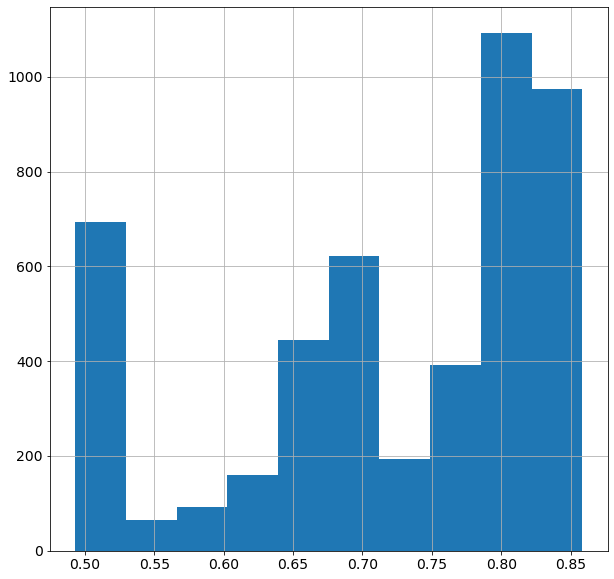

In [529]:
big_df['val_acc'].hist(figsize=(10, 10))

In [530]:
best_rows = []
best_accs = []
for df in csvs:
    best_accs.append(df.loc[:, 'val_acc'].max())
    best_rows.append(df.loc[df.loc[:, 'val_acc'].argmax()].to_dict())

In [531]:
best_df = pd.DataFrame(best_rows)
best_df = best_df.drop(columns= ["learning_rate", "hidden_units", "batch_size", "early_stopping"])

original = best_df[best_df['surprisal_cost'] == 0]
surprisal = best_df[best_df['surprisal_cost'] != 0]

In [532]:
print("No surprisal")
original

No surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
0,99,1.00E-03,0.00E+00,0,8.25E-01,3.26E-01,8.41E-01,3.11E-01,3.73E-01,7.15E-02,0.00E+00,0,0
1,99,1.00E-03,0.00E+00,1,8.33E-01,3.24E-01,8.41E-01,3.01E-01,3.71E-01,6.92E-02,0.00E+00,1,0
2,50,1.00E-03,0.00E+00,2,8.04E-01,3.24E-01,8.07E-01,3.17E-01,4.23E-01,7.31E-02,0.00E+00,2,0
3,49,1.00E-05,0.00E+00,0,8.45E-01,7.11E-01,8.45E-01,6.63E-01,3.60E-01,1.53E-03,0.00E+00,3,10
4,94,1.00E-05,0.00E+00,1,8.55E-01,7.98E-01,8.81E-01,7.76E-01,2.90E-01,1.79E-03,0.00E+00,4,10
5,98,1.00E-05,0.00E+00,2,8.52E-01,8.00E-01,8.67E-01,7.87E-01,3.26E-01,1.81E-03,0.00E+00,5,10
18,123,1.00E-06,0.00E+00,0,8.56E-01,8.76E-01,8.90E-01,8.74E-01,2.81E-01,2.01E-04,0.00E+00,18,15
19,34,1.00E-06,0.00E+00,1,7.10E-01,9.14E-01,6.93E-01,9.20E-01,6.09E-01,2.12E-04,0.00E+00,19,15
20,21,1.00E-06,0.00E+00,2,6.64E-01,8.43E-01,6.76E-01,8.73E-01,6.21E-01,2.01E-04,0.00E+00,20,15
45,62,1.00E-04,0.00E+00,0,8.47E-01,5.90E-01,8.51E-01,6.08E-01,3.42E-01,1.40E-02,0.00E+00,45,5


In [533]:
print("With surprisal")
surprisal

With surprisal


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
6,10,1.00E-05,1.00E-01,0,6.79E-01,1.00E+00,6.68E-01,1.00E+00,6.35E-01,2.30E-03,1.66E-02,6,11
7,87,1.00E-05,1.00E-01,1,7.18E-01,9.99E-01,7.05E-01,1.00E+00,6.00E-01,2.30E-03,3.92E-01,7,11
8,64,1.00E-05,1.00E-01,2,6.94E-01,1.00E+00,6.90E-01,1.00E+00,6.12E-01,2.30E-03,9.24E-02,8,11
9,77,1.00E-05,1.00E-02,0,6.62E-01,1.00E+00,6.46E-01,9.99E-01,6.42E-01,2.30E-03,4.05E-02,9,12
10,122,1.00E-05,1.00E-02,1,7.20E-01,9.98E-01,7.28E-01,9.98E-01,5.79E-01,2.30E-03,4.28E-02,10,12
11,21,1.00E-05,1.00E-02,2,6.91E-01,1.00E+00,6.82E-01,1.00E+00,6.21E-01,2.30E-03,8.88E-04,11,12
12,33,1.00E-05,1.00E-03,0,7.08E-01,9.99E-01,6.91E-01,9.99E-01,6.13E-01,2.30E-03,4.04E-03,12,13
13,67,1.00E-05,1.00E-03,1,7.21E-01,9.99E-01,7.11E-01,9.99E-01,5.95E-01,2.30E-03,4.13E-03,13,13
14,92,1.00E-05,1.00E-03,2,7.08E-01,9.99E-01,7.06E-01,9.99E-01,5.94E-01,2.30E-03,5.12E-03,14,13
15,15,1.00E-05,1.00E-04,0,6.61E-01,3.63E-01,6.43E-01,2.90E-01,6.47E-01,6.67E-04,6.87E-04,15,14


In [534]:
print("Dataframe with all best epochs for Validation accuracy")
best_df.sort_values(by='epoch')


Dataframe with all best epochs for Validation accuracy


,epoch,cost_per_sample,surprisal_cost,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index,exp
6,10,1.00E-05,1.00E-01,0,6.79E-01,1.00E+00,6.68E-01,1.00E+00,6.35E-01,2.30E-03,1.66E-02,6,11
22,12,1.00E-06,1.00E-01,1,5.10E-01,1.00E+00,5.13E-01,1.00E+00,6.89E-01,2.30E-04,3.54E-01,22,16
15,15,1.00E-05,1.00E-04,0,6.61E-01,3.63E-01,6.43E-01,2.90E-01,6.47E-01,6.67E-04,6.87E-04,15,14
21,15,1.00E-06,1.00E-01,0,5.14E-01,1.00E+00,5.14E-01,1.00E+00,6.89E-01,2.30E-04,4.85E-01,21,16
58,17,1.00E-04,1.00E-04,1,6.58E-01,2.37E-01,5.99E-01,2.09E-01,6.67E-01,4.81E-03,6.85E-04,58,9
53,18,1.00E-04,1.00E-02,2,6.48E-01,1.72E-01,6.39E-01,1.67E-01,6.48E-01,3.86E-03,6.85E-02,53,7
35,20,1.00E-03,1.00E-01,2,6.74E-01,9.99E-01,6.65E-01,1.00E+00,6.37E-01,2.30E-01,3.03E-01,35,1
30,21,1.00E-06,1.00E-04,0,7.00E-01,6.29E-01,6.83E-01,7.27E-01,6.18E-01,1.67E-04,6.70E-04,30,19
20,21,1.00E-06,0.00E+00,2,6.64E-01,8.43E-01,6.76E-01,8.73E-01,6.21E-01,2.01E-04,0.00E+00,20,15
11,21,1.00E-05,1.00E-02,2,6.91E-01,1.00E+00,6.82E-01,1.00E+00,6.21E-01,2.30E-03,8.88E-04,11,12


In [535]:
print("Dataframe with one per trials")
# mean_df = best_df.groupby(by=["cost_per_sample", "surprisal_cost"])
# sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="val_acc")
sorted = best_df.groupby(["cost_per_sample", "surprisal_cost"], sort="test_acc")
# sorted = best_df.groupby(["surprisal_cost"], sort="val_acc")
trial_mean = sorted.mean().reset_index()
# trial_cps_mean = best_df.groupby(["surprisal_cost"], sort="val_acc").mean().reset_index()
trial_mean

Dataframe with one per trials


,cost_per_sample,surprisal_cost,epoch,trial,val_acc,val_updates,train_acc,train_updates,entropy_loss,budget_loss,surprisal_loss,list_index
0,1.00E-06,0.00E+00,5.93E+01,1.00E+00,7.43E-01,8.78E-01,7.53E-01,8.89E-01,5.04E-01,2.05E-04,0.00E+00,1.90E+01
1,1.00E-06,1.00E-04,6.90E+01,1.00E+00,8.00E-01,7.86E-01,8.07E-01,8.08E-01,4.22E-01,1.86E-04,6.84E-04,3.10E+01
2,1.00E-06,1.00E-03,6.00E+01,1.00E+00,7.55E-01,9.19E-01,7.55E-01,9.09E-01,5.23E-01,2.09E-04,3.88E-03,2.80E+01
3,1.00E-06,1.00E-02,5.43E+01,1.00E+00,7.07E-01,9.99E-01,6.97E-01,1.00E+00,6.10E-01,2.30E-04,2.99E-02,2.50E+01
4,1.00E-06,1.00E-01,1.93E+01,1.00E+00,5.66E-01,1.00E+00,5.65E-01,1.00E+00,6.70E-01,2.30E-04,4.04E-01,2.20E+01
5,1.00E-05,0.00E+00,8.03E+01,1.00E+00,8.51E-01,7.70E-01,8.64E-01,7.42E-01,3.25E-01,1.71E-03,0.00E+00,4.00E+00
6,1.00E-05,1.00E-04,8.20E+01,1.00E+00,7.91E-01,6.18E-01,8.06E-01,5.81E-01,4.05E-01,1.34E-03,6.85E-04,1.60E+01
7,1.00E-05,1.00E-03,6.40E+01,1.00E+00,7.13E-01,9.99E-01,7.03E-01,9.99E-01,6.01E-01,2.30E-03,4.43E-03,1.30E+01
8,1.00E-05,1.00E-02,7.33E+01,1.00E+00,6.91E-01,9.99E-01,6.85E-01,9.99E-01,6.14E-01,2.30E-03,2.81E-02,1.00E+01
9,1.00E-05,1.00E-01,5.37E+01,1.00E+00,6.97E-01,1.00E+00,6.88E-01,1.00E+00,6.16E-01,2.30E-03,1.67E-01,7.00E+00


In [536]:
trial_mean.columns

Index(['cost_per_sample', 'surprisal_cost', 'epoch', 'trial', 'val_acc',
       'val_updates', 'train_acc', 'train_updates', 'entropy_loss',
       'budget_loss', 'surprisal_loss', 'list_index'],
      dtype='object')

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


-6.0 -3.0
0 0.0
5 0.3333333333333333
10 0.6666666666666666
15 1.0


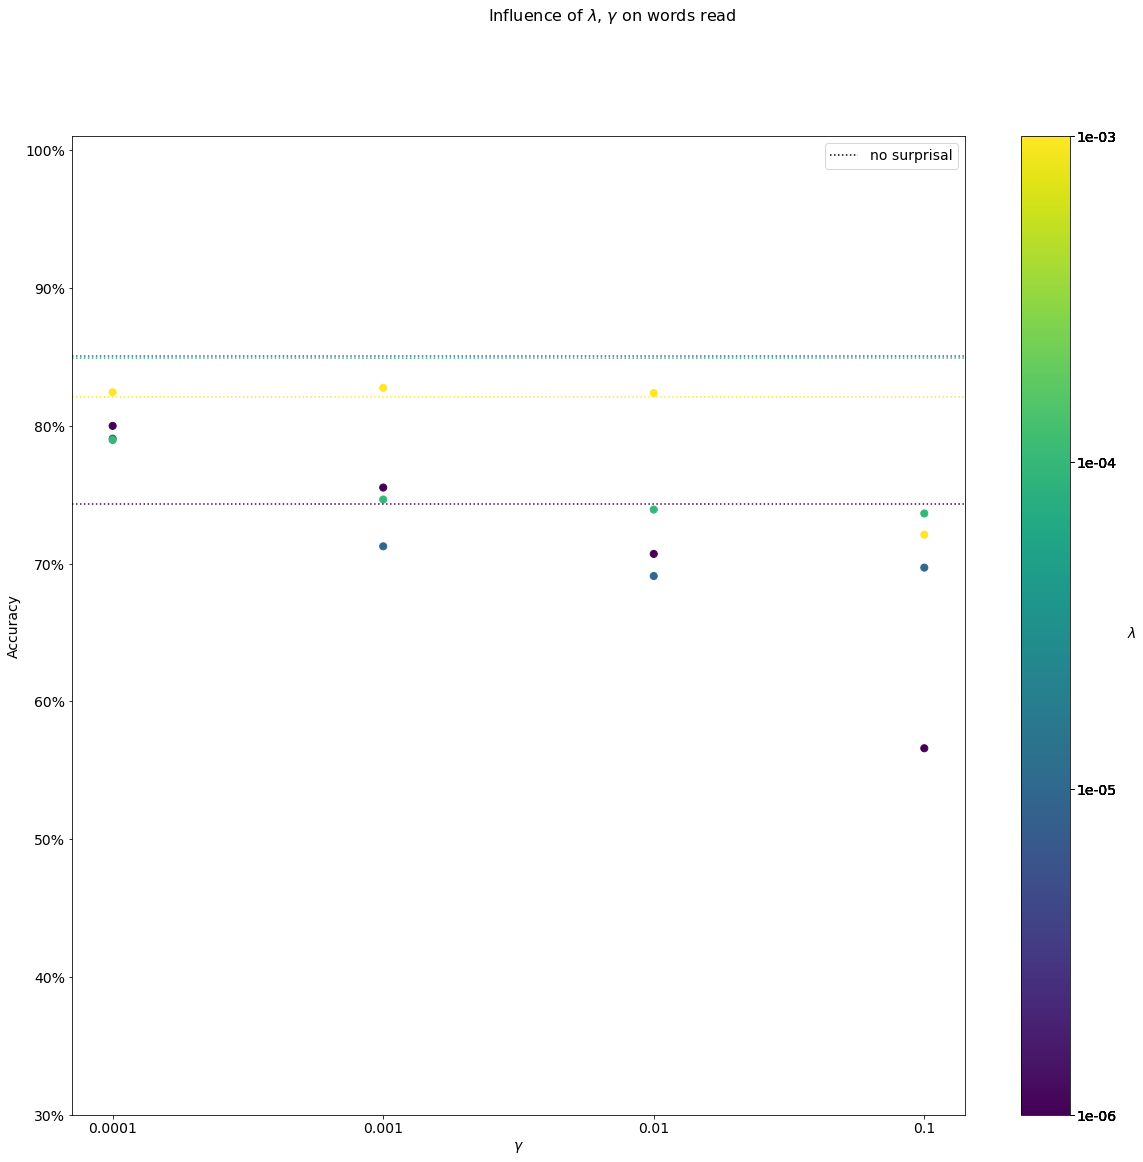

In [537]:
# Figure for last gridsearch.
pd.set_option('display.float_format', '{:.2E}'.format)
SMALL_SIZE = 14
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

# trial_mean['val_acc'].corr(trial_mean['surprisal_cost'], method='pearson')
fig, ax = plt.subplots(figsize=(20, 18))
cax = ax.scatter(x=np.log10(trial_mean['surprisal_cost']), y=trial_mean['val_acc'], c=np.log10(trial_mean['cost_per_sample']), marker='o', s=50)
# ax.plot(np.log10(trial_cps_mean['surprisal_cost']), (trial_cps_mean['val_updates']/2520)*100, c='orange', label="mean")
min = np.log10(trial_mean['cost_per_sample'].min())
max = np.log10(trial_mean['cost_per_sample'].max())
print(min, max)
cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=min, vmax=max)
for id, row in trial_mean[trial_mean['surprisal_cost'] == 0].iterrows():
    print(id, norm(np.log10(row['cost_per_sample'])))
    ax.axhline(row['val_acc'], linestyle=':', color=cmap(norm(np.log10(row['cost_per_sample']))))
plt.xticks([-4, -3, -2, -1], [0.0001, 0.001, 0.01, 0.1])
plt.yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ["30%", "40%", "50%", "60%", "70%", "80%", "90%", "100%"])
plt.ylim((0.3, 1.01))
cbar = fig.colorbar(cax, ticks=np.log10(trial_mean['cost_per_sample']))
cbar.ax.set_yticklabels(trial_mean['cost_per_sample'].apply(lambda x: '%1.0e'%x))
cbar.set_label(r"$\lambda$", rotation=0, labelpad=15, size=MEDIUM_SIZE)
ax.set_xlabel(r"$\gamma$")
ax.set_ylabel("Accuracy")
fig.suptitle(r"Influence of $\lambda$, $\gamma$ on words read")
plt.legend([Line2D([0],[0],linestyle=':', c="black")], ['no surprisal'])
plt.savefig("gridsearch_fig_accuracy.png")


In [538]:
# mean_df = mean_df.max()
# mean_df.sort_values(by='val_acc')
print("Clearer visualization")
# , axis=1, names=["acc_mean", "acc_std", "updates_mean",
# "updates_std"])
view = pd.DataFrame({'count': sorted.val_acc.count(),
                     'acc_mean': sorted.val_acc.mean(),
                     'acc_best': sorted.val_acc.max(),
                     'acc_worst': sorted.val_acc.min(),
                     'acc_std': sorted.val_acc.std(),
                     'updates_mean': sorted.val_updates.mean(),
                     'updates_std': sorted.val_updates.std(),
                     'epoch_mean': sorted.epoch.mean()})
# view.rename(columns=["acc_mean", "acc_std", "updates_mean", "updates_std"])
view[view['acc_mean'] > 0.8]

Clearer visualization


count  acc_mean  acc_best  acc_worst  acc_std  \
cost_per_sample surprisal_cost                                                  
1.00E-05        0.00E+00            3  8.51E-01  8.55E-01   8.45E-01 4.97E-03   
1.00E-04        0.00E+00            3  8.49E-01  8.53E-01   8.47E-01 3.76E-03   
1.00E-03        0.00E+00            3  8.21E-01  8.33E-01   8.04E-01 1.49E-02   
                1.00E-04            3  8.24E-01  8.29E-01   8.20E-01 4.48E-03   
                1.00E-03            3  8.27E-01  8.38E-01   8.16E-01 1.14E-02   
                1.00E-02            3  8.24E-01  8.32E-01   8.12E-01 1.07E-02   

                                updates_mean  updates_std  epoch_mean  
cost_per_sample surprisal_cost                                         
1.00E-05        0.00E+00            7.70E-01     5.10E-02    8.03E+01  
1.00E-04        0.00E+00            6.46E-01     6.29E-02    7.70E+01  
1.00E-03        0.00E+00            3.24E-01     9.34E-04    8.27E+01  
                1.00E-04            3.20E-01     5.79E-03    8.20E+01  
                1.00E-03            3.32E-01     4.58E-03    8.73E+01  
                1.00E-02            3.42E-01     2.00E-02    7.57E+01

In [539]:
# lr0001 = [csv for csv in csvs if csv['learning_rate'][0]==0.0001 and csv['hidden_units'][0]==32]

# temp = bs64_best.loc[(best_df['hidden_units']==96)]

In [540]:
if not os.path.exists(f"{folder}/plots"):
    os.makedirs(f"{folder}/plots")

for i, df in enumerate(csvs):
    # df.loc[:, ['val_updates', 'train_updates']] = df[['val_updates', 'train_updates']] / 2520
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    a = df[['val_acc', 'train_acc']].plot(figsize= (20, 15), ax=ax1, legend=None)
    ax1.set_ylim(0, 1.01)
    ax1.set_ylabel("Accuracy")
    # ax1.legend(loc=2)
    lns = ax1.get_lines()
    ax2 = ax1.twinx()
    b = df['val_updates'].plot(ax=ax2, c='r', label="val_updates")
    c = df['train_updates'].plot(ax=ax2, c='g', label="train_updates")
    ax2.set_ylabel("Updates")
    ax2.set_ylim(0, 1.01)
    # lns.append(ax2.get_lines)
    # labs = [l.get_label() for l in lns]
    fig.legend(bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    fig.savefig(f"{folder}/plots/idx{i}_acc{round(best_accs[i], 2)}_cps{csvs[i].cost_per_sample[0]}_s{csvs[i].surprisal_cost[0]}_exp{csvs[i].exp[0]}.png")
    plt.clf()

C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\emyms\anaconda3\envs\skiprnn-2017-telecombcn\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [541]:
# if not os.path.exists(f"{folder}/lrplots"):
#     os.makedirs(f"{folder}/lrplots")
#
# for i, df in enumerate(lr0001):
#     df[['val_acc', 'train_acc']].plot().get_figure().savefig(f"{folder}/lrplots/idx{i}.png")
#

In [542]:
# best_hyper = pd.concat(lr0001)
#
# best_hyper_diff = best_hyper['val_acc'].diff(15)
# best_hyper_diff.abs().mean()


In [543]:
s_read_vocab = []
s_skipped_vocab = []
ns_read_vocab = []
ns_skipped_vocab = []

s_read_surp = []
s_skipped_surp = []
ns_read_surp = []
ns_skipped_surp = []

for file in os.listdir(folder + '/analysis'):
    file = folder + '/analysis/' + file
    if "pkl" in file:
        if "SC0.01" in file:
            if "non" in file:
                s_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                s_read_vocab.append(pickle.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_vocab.append(pickle.load(open(file, 'rb')))
            else:
                ns_read_vocab.append(pickle.load(open(file, 'rb')))
    else:
        if "SC0.01" in file:
            if "non" in file:
                s_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                s_read_surp.append(np.load(open(file, 'rb')))
        else:
            if "non" in file:
                ns_skipped_surp.append(np.load(open(file, 'rb')))
            else:
                ns_read_surp.append(np.load(open(file, 'rb')))

FileNotFoundError: [WinError 3] Impossibile trovare il percorso specificato: '../../AfterFailure/analysis'

In [ ]:
# nsr_surp = ns_read_surp[0]
# nss_surp = ns_skipped_surp[0]
#
# print(len(nss_surp))
# print(len(nsr_surp))
#
# print(nsr_surp.mean())
# print(nss_surp.mean())
#
# plt.hist(nsr_surp)
# plt.hist(nss_surp)


In [ ]:
sr_surp = s_read_surp[0]
ss_surp = s_skipped_surp[0]

print(f"skipped length {len(ss_surp)}")
print(f"read length {len(sr_surp)}")

print(f"read surprisal {sr_surp.mean()}")
print(f"skipped surprisal {ss_surp.mean()}")

plt.hist(sr_surp)
# plt.hist(ss_surp)

print(ss_surp)

print(np.count_nonzero(sr_surp == 0))
print(np.count_nonzero(ss_surp == 0))

print(s_read_vocab)
print(s_skipped_vocab)